# Expedia Project

## Imports

In [1]:
#imports
import pandas as pd # for dataframe handling
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.cluster import KMeans # KMeans ML model
import matplotlib.pyplot as plt # plotting
from kneed import KneeLocator # assists with finding the correct number of clusters
from sklearn.preprocessing import PowerTransformer # applying a tranformation on the data to allow to handle skewness of datatra
from sklearn.model_selection import train_test_split # splitting the data into training and testing 
import numpy as np # numpy
from sklearn.cluster import KMeans # KMeans
from sklearn.linear_model import LogisticRegression # Logisitic Regression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
) # accuracy measures
import seaborn as sns
from sklearn.decomposition import PCA
import shap

In [2]:
# reading the data into df
data = pd.read_csv('train.csv')

## Exploratory Analysis

In [3]:
data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [4]:
# checking the shape 
data.shape

(9917530, 54)

In [5]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9917530 entries, 0 to 9917529
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [6]:
# checking central tendency measures
data.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,9.917530e+06,9.917530e+06,9.917530e+06,505297.000000,507612.000000,9.917530e+06,9.917530e+06,9.917530e+06,9.902900e+06,9.917530e+06,...,1.933120e+05,631077.000000,713175.000000,277838.000000,3.819043e+06,3.960388e+06,1.225707e+06,9.917530e+06,276592.000000,9.917530e+06
mean,3.329138e+05,9.966175e+00,1.752954e+02,3.374634,176.588512,1.739055e+02,7.008015e+04,3.181534e+00,3.777702e+00,6.343042e-01,...,2.301390e+01,0.147061,0.082259,20.141888,-6.072490e-02,9.889435e-03,2.321000e+01,4.473614e-02,386.530099,2.788930e-02
std,1.922876e+05,7.657325e+00,6.590955e+01,0.692218,108.434842,6.834768e+01,4.061177e+04,1.050191e+00,1.050806e+00,4.816248e-01,...,2.560429e+03,0.578748,0.316165,136.217976,4.692456e-01,2.031648e-01,9.462088e+02,2.067240e-01,801.073164,1.646557e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.665160e+05,5.000000e+00,1.000000e+02,2.920000,110.330000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000e+00,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,124.240000,0.000000e+00
50%,3.328140e+05,5.000000e+00,2.190000e+02,3.440000,151.830000,2.190000e+02,6.961500e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,1.100000e+01,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,219.420000,0.000000e+00
75%,4.999000e+05,1.400000e+01,2.190000e+02,3.940000,214.350000,2.190000e+02,1.051770e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,1.800000e+01,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,431.760000,0.000000e+00
max,6.655740e+05,3.400000e+01,2.310000e+02,5.000000,2768.930000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1.125686e+06,1.000000,1.000000,30216.000000,1.000000e+00,1.000000e+00,1.494000e+05,1.000000e+00,167740.590000,1.000000e+00


In [7]:
# checking null values
data.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

In [8]:
# checking max values
data.max()

srch_id                                     665574
date_time                      2013-06-30 23:58:24
site_id                                         34
visitor_location_country_id                    231
visitor_hist_starrating                        5.0
visitor_hist_adr_usd                       2768.93
prop_country_id                                230
prop_id                                     140821
prop_starrating                                  5
prop_review_score                              5.0
prop_brand_bool                                  1
prop_location_score1                          6.98
prop_location_score2                           1.0
prop_log_historical_price                     6.21
position                                        40
price_usd                               19726328.0
promotion_flag                                   1
srch_destination_id                          28416
srch_length_of_stay                             59
srch_booking_window            

In [9]:
data.min()

srch_id                                          1
date_time                      2012-11-01 00:01:37
site_id                                          1
visitor_location_country_id                      1
visitor_hist_starrating                        1.0
visitor_hist_adr_usd                           0.0
prop_country_id                                  1
prop_id                                          1
prop_starrating                                  0
prop_review_score                              0.0
prop_brand_bool                                  0
prop_location_score1                           0.0
prop_location_score2                           0.0
prop_log_historical_price                      0.0
position                                         1
price_usd                                      0.0
promotion_flag                                   0
srch_destination_id                              2
srch_length_of_stay                              1
srch_booking_window            

In [10]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=['number'], exclude=['bool'])

# Remove columns that are boolean
numeric_df = numeric_df.loc[:, ~(numeric_df.nunique() == 2)]

# Compute IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Create boolean mask of outliers
outlier_mask = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Show count of outliers per column
outlier_counts = outlier_mask.sum()
print(outlier_counts)

srch_id                              0
site_id                         502466
visitor_location_country_id          0
visitor_hist_starrating            119
visitor_hist_adr_usd             23780
prop_country_id                      0
prop_id                              0
prop_starrating                 372308
prop_review_score               522961
prop_location_score1                 0
prop_location_score2            540785
prop_log_historical_price      1433512
position                             0
price_usd                       586503
srch_destination_id                  0
srch_length_of_stay             465314
srch_booking_window             829119
srch_adults_count              3422561
srch_children_count            2286785
srch_room_count                 871750
srch_query_affinity_score        24626
orig_destination_distance       836328
comp1_rate                           0
comp1_inv                        13383
comp1_rate_percent_diff          17373
comp2_rate               

## Data Preparation

In [11]:
# select necessary cols
features = ['price_usd', 'promotion_flag', 'srch_length_of_stay', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'orig_destination_distance','booking_bool', 'srch_saturday_night_bool', 'prop_review_score', 'prop_starrating']
data = data[features]
data.shape

(9917530, 11)

In [12]:
# remove nulls values
data_clean = data.dropna()

In [13]:
# checking cleaned data
data_clean.shape

(6693717, 11)

In [14]:
# Checking outliers again
# Select only numeric columns
numeric_df = data_clean.select_dtypes(include=['number'], exclude=['bool'])

# Remove columns that are boolean
numeric_df = numeric_df.loc[:, ~(numeric_df.nunique() == 2)]

# Compute IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Create boolean mask of outliers
outlier_mask = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Show count of outliers per column
outlier_counts = outlier_mask.sum()
print(outlier_counts)

price_usd                     407539
srch_length_of_stay           260605
srch_adults_count            2226203
srch_children_count          1550676
srch_room_count               546077
orig_destination_distance     835024
prop_review_score             260192
prop_starrating               249580
dtype: int64


In [15]:
# Extreme outlier capping
numeric_df = data_clean.select_dtypes(include=['number'])
numeric_df = numeric_df.loc[:, ~(numeric_df.nunique() == 2)]  # drop binary

lower = numeric_df.quantile(0.01)
upper = numeric_df.quantile(0.99)

data_clean.loc[:, numeric_df.columns] = numeric_df.clip(lower=lower, upper=upper, axis=1)

In [16]:
# desired size
n_total = 1000000

# target proportions
p_proportion = 0.5
n_proportion = 0.5

# split the dataset into the positive and negative sub-datasets
df_positive = data_clean[data_clean['booking_bool'] == 1]
df_negative = data_clean[data_clean['booking_bool'] == 0]

# number of rows from each
n_pos = int(n_total * p_proportion)
n_neg = int(n_total * n_proportion)

# sample from each
sampled_pos = df_positive.sample(n=n_pos,replace=True, random_state=42)
sampled_neg = df_negative.sample(n=n_neg, replace=False, random_state=42)

In [17]:
balanced_sample = pd.concat([sampled_neg, sampled_pos])
balanced_sample

,price_usd,promotion_flag,srch_length_of_stay,srch_adults_count,srch_children_count,srch_room_count,orig_destination_distance,booking_bool,srch_saturday_night_bool,prop_review_score,prop_starrating
4778178,130.57,0,3,1,0,1,1631.73,0,1,4.0,3
3339234,92.90,1,3,2,0,1,2270.85,0,0,4.0,3
2564940,161.00,0,1,3,0,1,1625.49,0,0,5.0,4
6034291,104.00,0,1,3,2,1,159.30,0,1,4.5,3
1283806,462.00,0,1,2,2,1,84.97,0,1,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...
1975545,64.00,0,1,1,1,1,227.55,1,1,3.5,2
5611242,46.00,0,6,2,0,1,116.02,1,0,2.5,2
1562707,135.00,0,3,2,0,1,282.55,1,1,4.0,3
8537659,69.00,0,1,4,0,2,52.31,1,1,4.0,3


In [18]:
# Checking the max values of each factor of balanced_sample
balanced_sample.max()

price_usd                     567.00
promotion_flag                  1.00
srch_length_of_stay             9.00
srch_adults_count               5.00
srch_children_count             3.00
srch_room_count                 3.00
orig_destination_distance    9683.93
booking_bool                    1.00
srch_saturday_night_bool        1.00
prop_review_score               5.00
prop_starrating                 5.00
dtype: float64

We assgin click_bool, promotion_flag and booking_bool as binary factors, and all others are numeric ones.

In [19]:
# initialize the standard scalar
scale = StandardScaler()
pt = PowerTransformer(method='yeo-johnson') # power transformer for adjusting for skewness of data
num_cols = ['price_usd', 'srch_length_of_stay', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'orig_destination_distance', 
            'prop_starrating', 'prop_review_score']
bin_cols = ['promotion_flag', 'srch_saturday_night_bool']
# scale the data
scaled = balanced_sample.copy()
scaled[num_cols] = scale.fit_transform(pt.fit_transform(scaled[num_cols]))

# Keep numeric + binary columns together
X_final = scaled[num_cols + bin_cols]
X_final.head()

,price_usd,srch_length_of_stay,srch_adults_count,srch_children_count,srch_room_count,orig_destination_distance,prop_starrating,prop_review_score,promotion_flag,srch_saturday_night_bool
4778178,0.221840,1.051673,-1.545818,-0.558565,-0.31471,0.795785,-0.244486,-0.069595,0,1
3339234,-0.443058,1.051673,0.232064,-0.558565,-0.31471,1.018649,-0.244486,-0.069595,1,0
2564940,0.605351,-0.974238,1.318430,-0.558565,-0.31471,0.793244,0.883857,2.129706,0,0
6034291,-0.216695,-0.974238,1.318430,1.849147,-0.31471,-0.581979,-0.244486,0.905311,0,1
1283806,2.268610,-0.974238,0.232064,1.849147,-0.31471,-0.901451,0.883857,-0.069595,0,1


C:\Users\tcame\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tcame\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\tcame\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tcame\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

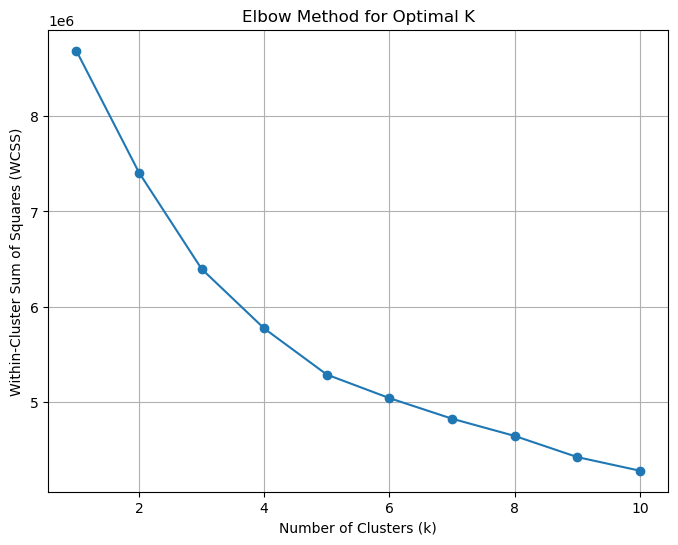

In [20]:
# elbow method to get number of clusters
wcss = []
# Iterate through a range of k values (e.g., from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for multiple initializations
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ gives the WCSS

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

From the above graph it is hard to tell the number of clusters that is optimal, so I am going to use the KneeLocator library to assist with this

In [21]:
# using the KneeLocator to find Optimal k
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing' 
                )
print(f'The optimal number of clusters is {kl.elbow}')

The optimal number of clusters is 4


## Model Building K-Means

In [22]:
# initialize the KMeans model
km = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=42)

In [23]:
# get the labels 
labels = km.fit_predict(X_final)

# add the labels to the dataframe
X_final.loc[:, 'Cluster'] = labels
X_final.head()

,price_usd,srch_length_of_stay,srch_adults_count,srch_children_count,srch_room_count,orig_destination_distance,prop_starrating,prop_review_score,promotion_flag,srch_saturday_night_bool,Cluster
4778178,0.221840,1.051673,-1.545818,-0.558565,-0.31471,0.795785,-0.244486,-0.069595,0,1,1
3339234,-0.443058,1.051673,0.232064,-0.558565,-0.31471,1.018649,-0.244486,-0.069595,1,0,1
2564940,0.605351,-0.974238,1.318430,-0.558565,-0.31471,0.793244,0.883857,2.129706,0,0,1
6034291,-0.216695,-0.974238,1.318430,1.849147,-0.31471,-0.581979,-0.244486,0.905311,0,1,3
1283806,2.268610,-0.974238,0.232064,1.849147,-0.31471,-0.901451,0.883857,-0.069595,0,1,3


In [24]:
# Absolute counts
print(X_final['Cluster'].value_counts())

# Relative percentages
print(X_final['Cluster'].value_counts(normalize=True) * 100)

Cluster
1    386490
2    336644
3    186764
0     90102
Name: count, dtype: int64
Cluster
1    38.6490
2    33.6644
3    18.6764
0     9.0102
Name: proportion, dtype: float64


In [25]:

# initialize pca to reduce data to 2 components for graphing
pca = PCA(n_components=2, random_state=42)

# transform the X_data
X_2d = pca.fit_transform(X_final.drop('Cluster', axis=1))

# tranform the centers
centers_2d = pca.transform(km.cluster_centers_)

C:\Users\tcame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


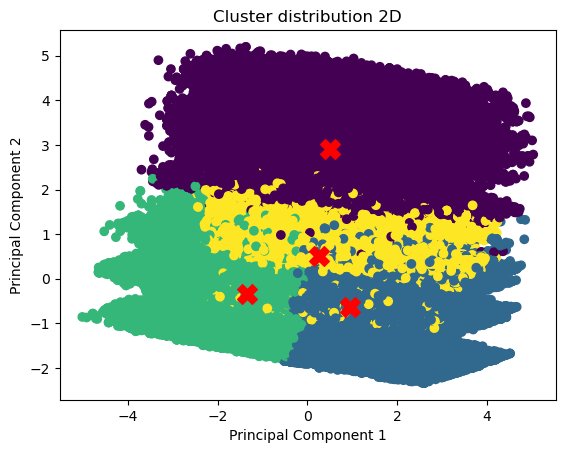

In [26]:
# visualization
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='viridis')
plt.scatter(centers_2d[:, 0], centers_2d[:,1], c='red', marker='X', s=200)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster distribution 2D')
plt.show()

In [27]:
print(pca.explained_variance_ratio_)

[0.23554471 0.16095096]


In [28]:
X_scaled_df = pd.DataFrame(X_final, columns=num_cols + bin_cols)

X_scaled_df['Cluster'] = labels
cluster_means_scaled = X_scaled_df.groupby('Cluster').mean().round(2)
importance = cluster_means_scaled.std().sort_values(ascending=False)
X_scaled_df.head().round(2)

,price_usd,srch_length_of_stay,srch_adults_count,srch_children_count,srch_room_count,orig_destination_distance,prop_starrating,prop_review_score,promotion_flag,srch_saturday_night_bool,Cluster
4778178,0.22,1.05,-1.55,-0.56,-0.31,0.80,-0.24,-0.07,0,1,1
3339234,-0.44,1.05,0.23,-0.56,-0.31,1.02,-0.24,-0.07,1,0,1
2564940,0.61,-0.97,1.32,-0.56,-0.31,0.79,0.88,2.13,0,0,1
6034291,-0.22,-0.97,1.32,1.85,-0.31,-0.58,-0.24,0.91,0,1,3
1283806,2.27,-0.97,0.23,1.85,-0.31,-0.90,0.88,-0.07,0,1,3


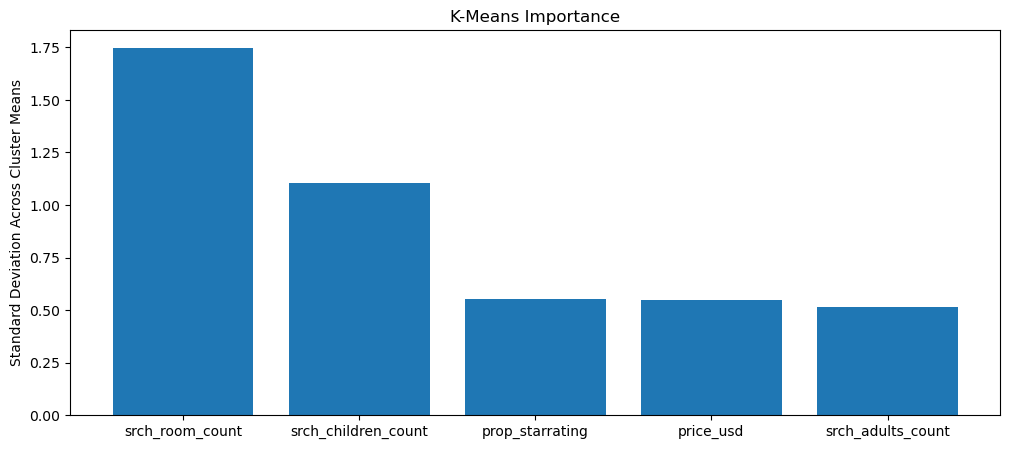

In [29]:
# visual
plt.figure(figsize=(12,5))
plt.bar(x=importance.iloc[:5].index, height=importance.iloc[:5])
plt.title('K-Means Importance')
plt.ylabel('Standard Deviation Across Cluster Means')
plt.show()

In [30]:
# Checking the distinct factors of each cluster
X_scaled_df['booking_bool'] = balanced_sample['booking_bool'].astype(int)
cluster_profile = X_scaled_df.groupby('Cluster')[num_cols + bin_cols + ['booking_bool']].mean().round(2)
cluster_profile


,price_usd,srch_length_of_stay,srch_adults_count,srch_children_count,srch_room_count,orig_destination_distance,prop_starrating,prop_review_score,promotion_flag,srch_saturday_night_bool,booking_bool
Cluster,,,,,,,,,,,
0,0.04,0.04,0.94,0.56,3.18,0.16,0.11,0.04,0.25,0.51,0.55
1,0.57,0.17,-0.10,-0.55,-0.31,0.21,0.61,0.53,0.27,0.51,0.49
2,-0.74,-0.26,-0.16,-0.51,-0.31,-0.31,-0.73,-0.67,0.22,0.55,0.49
3,0.14,0.10,0.03,1.79,-0.31,0.04,0.01,0.08,0.25,0.54,0.51


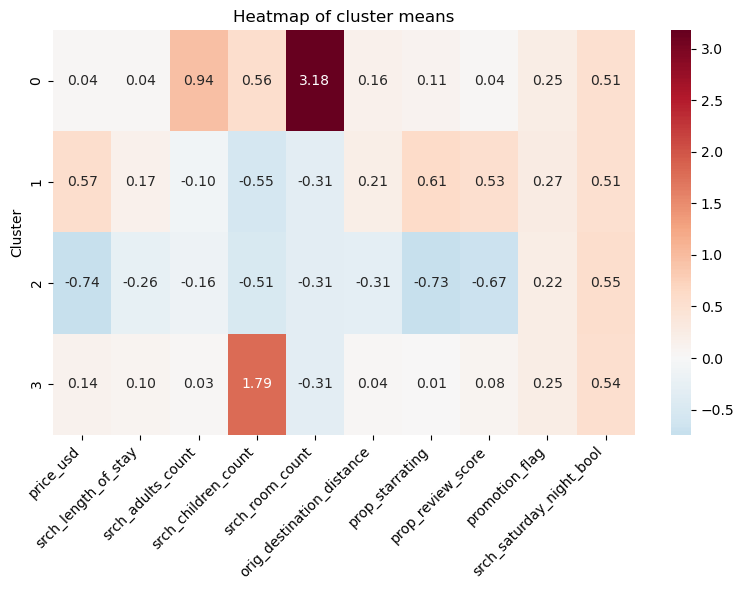

In [61]:
# create a heatmap of the cluster means
plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled_df.drop('booking_bool', axis=1).groupby('Cluster').mean(),
           annot=True,        
            fmt=".2f",         
            cmap="RdBu_r",   
            center=0)
plt.title("Heatmap of cluster means")
plt.ylabel("Cluster")
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Segment 1 Regression Analysis

Accuracy: 0.591580037734453
Precision: 0.6023411005360464
Recall: 0.7449600865918008
F1 Score: 0.6661021050084684


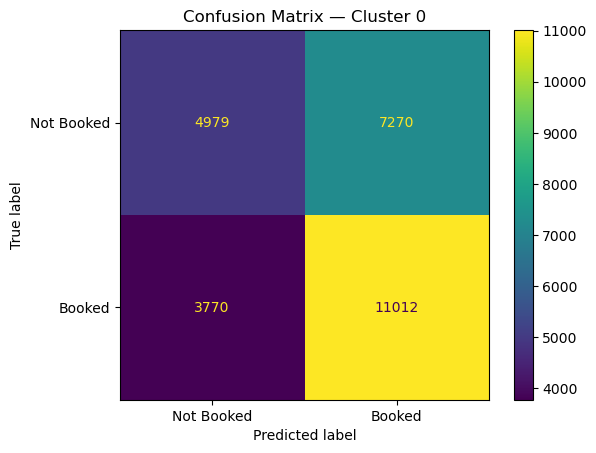

In [31]:
# initialize model
log_reg = LogisticRegression()

# subset cluster 0
cluster_0 = X_scaled_df[X_scaled_df['Cluster'] == 0]

# define X and y
X = cluster_0.drop(['booking_bool', 'Cluster'], axis=1)
y = cluster_0['booking_bool']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# fit model
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)

# -------------------------
# Performance Metrics
# -------------------------

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# -------------------------
# Confusion Matrix
# -------------------------

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Not Booked', 'Booked'])

disp.plot(values_format='d')
plt.title("Confusion Matrix — Cluster 0")
plt.show()

In [32]:
# display coefficients for each Feature
coefficients_0 = pd.DataFrame({
    'Feature':X.columns,
    'Coefficient': log_reg.coef_[0]})
intercept = log_reg.intercept_[0]

print(f'book = {np.round(intercept, 2)}', end=' ')

for i, feature in enumerate(coefficients_0['Feature']):
    print(f'+ ({np.round(coefficients_0.iloc[i, 1], 2)}*{feature})', end=" ")


book = 0.02 + (-0.31*price_usd) + (-0.17*srch_length_of_stay) + (-0.15*srch_adults_count) + (0.02*srch_children_count) + (0.07*srch_room_count) + (-0.0*orig_destination_distance) + (0.24*prop_starrating) + (0.14*prop_review_score) + (0.29*promotion_flag) + (-0.02*srch_saturday_night_bool) 

In [33]:
# adding a cluster value
coefficients_0['Cluster'] = 0

In [34]:
coefficients_0

,Feature,Coefficient,Cluster
0,price_usd,-0.311626,0
1,srch_length_of_stay,-0.170299,0
2,srch_adults_count,-0.145307,0
3,srch_children_count,0.021672,0
4,srch_room_count,0.072677,0
5,orig_destination_distance,-0.004052,0
6,prop_starrating,0.235292,0
7,prop_review_score,0.136386,0
8,promotion_flag,0.290725,0
9,srch_saturday_night_bool,-0.022963,0


In [35]:
cluster_0.head().round(2)

,price_usd,srch_length_of_stay,srch_adults_count,srch_children_count,srch_room_count,orig_destination_distance,prop_starrating,prop_review_score,promotion_flag,srch_saturday_night_bool,Cluster,booking_bool
106227,-0.09,1.05,2.07,-0.56,3.18,0.62,0.88,0.91,0,1,0,0
2259040,-2.39,1.38,2.07,1.87,3.18,-0.16,-1.21,-1.82,0,0,0,0
5156011,-1.70,-0.97,2.07,-0.56,3.18,2.03,0.88,0.91,0,0,0,0
1234261,-2.27,0.44,-1.55,1.74,3.18,1.99,-0.24,-1.40,0,0,0,0
3288755,1.37,1.38,0.23,-0.56,3.18,0.79,0.88,0.91,1,0,0,0


## Segment 2 Regression Analysis

Accuracy: 0.596341431861109
Precision: 0.594910616563298
Recall: 0.5700676466989459
F1 Score: 0.5822242455078596


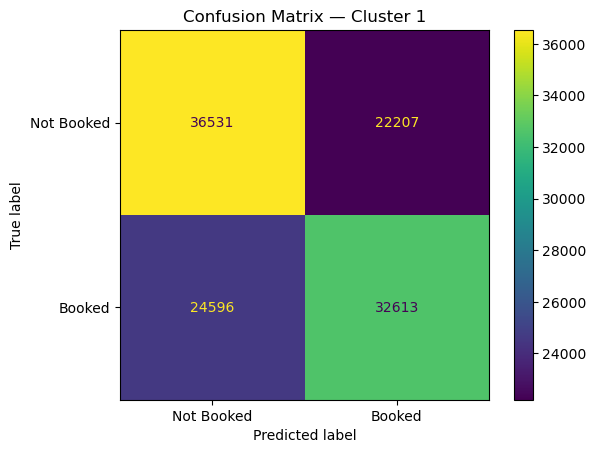

In [36]:
# initialize model
log_reg = LogisticRegression()

# subset cluster 0
cluster_1 = X_scaled_df[X_scaled_df['Cluster'] == 1]

# define X and y
X = cluster_1.drop(['booking_bool', 'Cluster'], axis=1)
y = cluster_1['booking_bool']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# fit model
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)

# -------------------------
# Performance Metrics
# -------------------------

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# -------------------------
# Confusion Matrix
# -------------------------

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Not Booked', 'Booked'])

disp.plot(values_format='d')
plt.title("Confusion Matrix — Cluster 1")
plt.show()

In [37]:
# display coefficients for each Feature
coefficients_1 = pd.DataFrame({
    'Feature':X.columns,
    'Coefficient': log_reg.coef_[0]})
intercept = log_reg.intercept_[0]

print(f'book = {np.round(intercept, 2)}', end=' ')

for i, feature in enumerate(coefficients_1['Feature']):
    print(f'+ ({np.round(coefficients_1.iloc[i, 1], 2)}*{feature})', end=" ")


book = 0.02 + (-0.52*price_usd) + (-0.16*srch_length_of_stay) + (-0.03*srch_adults_count) + (-0.01*srch_children_count) + (-0.01*srch_room_count) + (0.01*orig_destination_distance) + (0.23*prop_starrating) + (-0.03*prop_review_score) + (0.38*promotion_flag) + (0.05*srch_saturday_night_bool) 

In [38]:
# adding a cluster value
coefficients_1['Cluster'] = 1

In [39]:
coefficients_1

,Feature,Coefficient,Cluster
0,price_usd,-0.523497,1
1,srch_length_of_stay,-0.155080,1
2,srch_adults_count,-0.032865,1
3,srch_children_count,-0.010398,1
4,srch_room_count,-0.007546,1
5,orig_destination_distance,0.010935,1
6,prop_starrating,0.232278,1
7,prop_review_score,-0.032190,1
8,promotion_flag,0.381154,1
9,srch_saturday_night_bool,0.052435,1


## Segment 3 Regression Analysis

Accuracy: 0.586331861298691
Precision: 0.5848330725091289
Recall: 0.5426548886737658
F1 Score: 0.5629550590007532


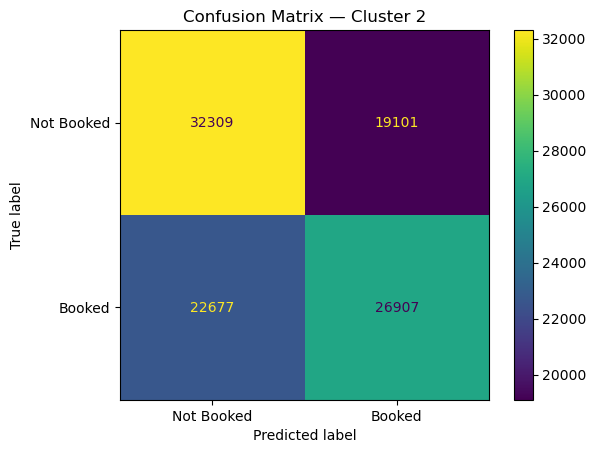

In [40]:
# initialize model
log_reg = LogisticRegression()

# subset cluster 0
cluster_2 = X_scaled_df[X_scaled_df['Cluster'] == 2]

# define X and y
X = cluster_2.drop(['booking_bool', 'Cluster'], axis=1)
y = cluster_2['booking_bool']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# fit model
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)

# -------------------------
# Performance Metrics
# -------------------------

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# -------------------------
# Confusion Matrix
# -------------------------

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Not Booked', 'Booked'])

disp.plot(values_format='d')
plt.title("Confusion Matrix — Cluster 2")
plt.show()

In [41]:
# display coefficients for each Feature
coefficients_2 = pd.DataFrame({
    'Feature':X.columns,
    'Coefficient': log_reg.coef_[0]})
intercept = log_reg.intercept_[0]

print(f'book = {np.round(intercept, 2)}', end=' ')

for i, feature in enumerate(coefficients_2['Feature']):
    print(f'+ ({np.round(coefficients_2.iloc[i, 1], 2)}*{feature})', end=" ")

book = 0.01 + (-0.14*price_usd) + (-0.14*srch_length_of_stay) + (-0.05*srch_adults_count) + (-0.1*srch_children_count) + (-0.0*srch_room_count) + (-0.03*orig_destination_distance) + (0.26*prop_starrating) + (0.28*prop_review_score) + (0.57*promotion_flag) + (-0.01*srch_saturday_night_bool) 

In [42]:
# adding a cluster value
coefficients_2['Cluster'] = 2

In [43]:
coefficients_2

,Feature,Coefficient,Cluster
0,price_usd,-0.140438,2
1,srch_length_of_stay,-0.139782,2
2,srch_adults_count,-0.045414,2
3,srch_children_count,-0.097553,2
4,srch_room_count,-0.003855,2
5,orig_destination_distance,-0.027413,2
6,prop_starrating,0.262955,2
7,prop_review_score,0.275156,2
8,promotion_flag,0.571555,2
9,srch_saturday_night_bool,-0.008793,2


## Segment 4 Regression Analysis

Accuracy: 0.5854363733714082
Precision: 0.588577246452969
Recall: 0.6261267556425127
F1 Score: 0.6067716268833587


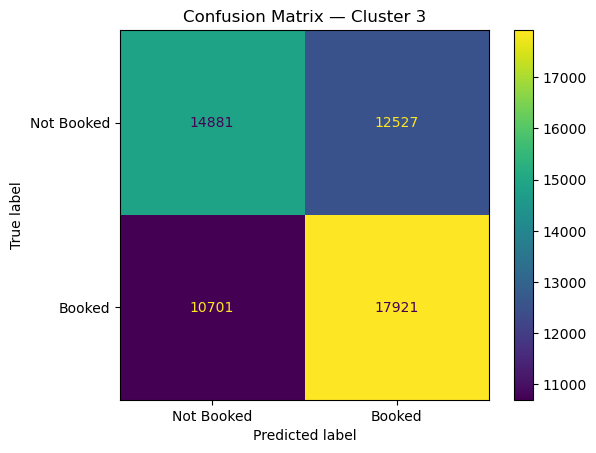

In [44]:
# initialize model
log_reg = LogisticRegression()

# subset cluster 0
cluster_3 = X_scaled_df[X_scaled_df['Cluster'] == 3]

# define X and y
X = cluster_3.drop(['booking_bool', 'Cluster'], axis=1)
y = cluster_3['booking_bool']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# fit model
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)

# -------------------------
# Performance Metrics
# -------------------------

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# -------------------------
# Confusion Matrix
# -------------------------

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Not Booked', 'Booked'])

disp.plot(values_format='d')
plt.title("Confusion Matrix — Cluster 3")
plt.show()

In [45]:
# display coefficients for each Feature
coefficients_3 = pd.DataFrame({
    'Feature':X.columns,
    'Coefficient': log_reg.coef_[0]})
intercept = log_reg.intercept_[0]

print(f'book = {np.round(intercept, 2)}', end=' ')

for i, feature in enumerate(coefficients_3['Feature']):
    print(f'+ ({np.round(coefficients_3.iloc[i, 1], 2)}*{feature})', end=" ")

book = -0.68 + (-0.35*price_usd) + (-0.18*srch_length_of_stay) + (0.0*srch_adults_count) + (0.39*srch_children_count) + (0.21*srch_room_count) + (0.02*orig_destination_distance) + (0.24*prop_starrating) + (0.18*prop_review_score) + (0.37*promotion_flag) + (0.08*srch_saturday_night_bool) 

In [46]:
# adding a cluster value
coefficients_3['Cluster'] = 3

In [47]:
coefficients_3

,Feature,Coefficient,Cluster
0,price_usd,-0.349166,3
1,srch_length_of_stay,-0.177551,3
2,srch_adults_count,0.003911,3
3,srch_children_count,0.388023,3
4,srch_room_count,0.213918,3
5,orig_destination_distance,0.019281,3
6,prop_starrating,0.235088,3
7,prop_review_score,0.180140,3
8,promotion_flag,0.372337,3
9,srch_saturday_night_bool,0.078066,3


## Findings

----- MODEL PERFORMANCE ACROSS CLUSTERS -----
         Accuracy  Precision    Recall  F1 Score
Cluster                                         
0        0.591580   0.602341  0.744960  0.666102
1        0.596341   0.594911  0.570068  0.582224
2        0.586332   0.584833  0.542655  0.562955
3        0.585436   0.588577  0.626127  0.606772


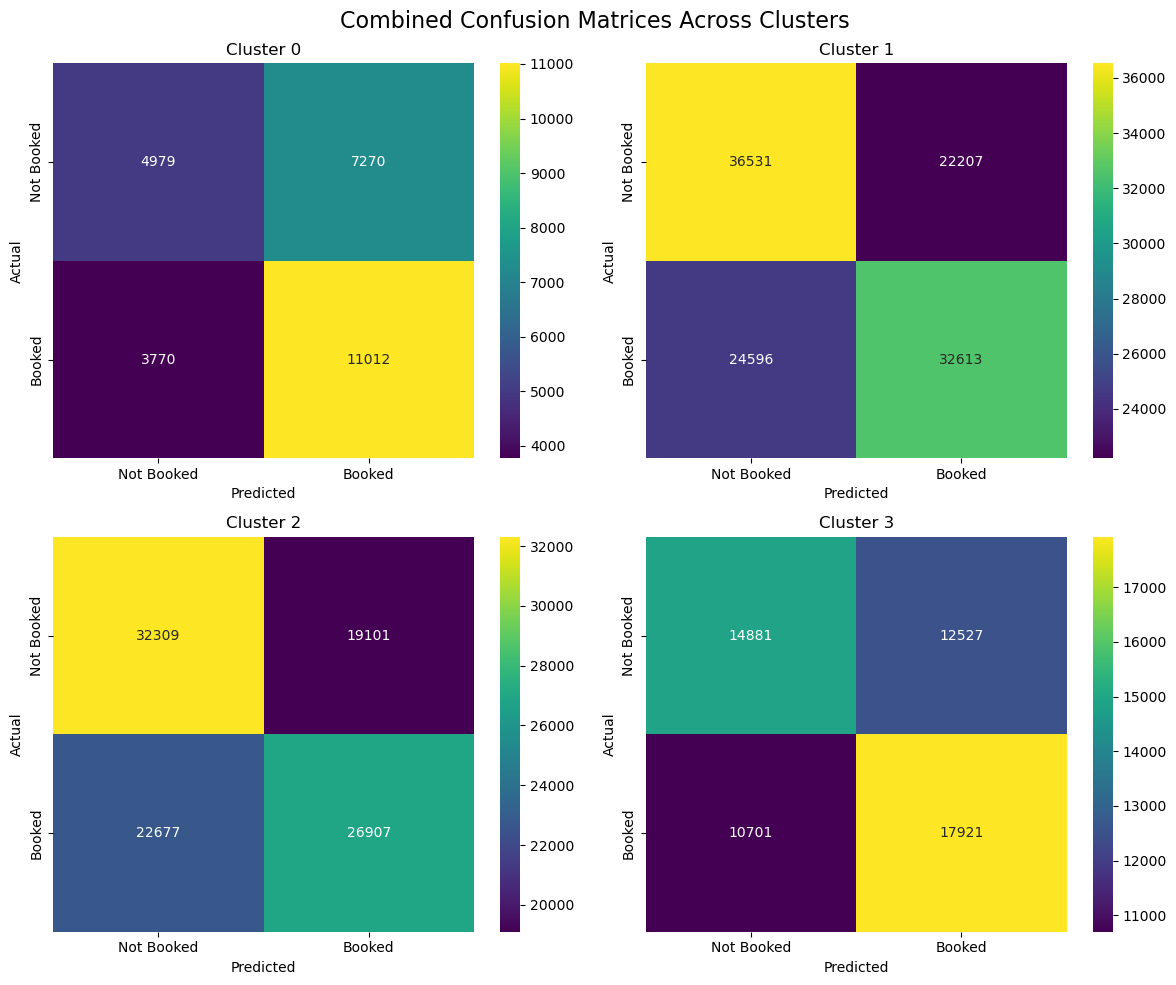

In [48]:
clusters = sorted(X_scaled_df['Cluster'].unique())

metrics_list = []
conf_matrices = []      # store confusion matrices here
titles = []             # cluster titles for plotting

for c in clusters:
    # subset cluster
    cluster_df = X_scaled_df[X_scaled_df['Cluster'] == c]

    # define X and y
    X = cluster_df.drop(['booking_bool', 'Cluster'], axis=1)
    y = cluster_df['booking_bool']

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # model
    log_reg = LogisticRegression(max_iter=200)
    log_reg.fit(X_train, y_train)

    # predictions
    y_pred = log_reg.predict(X_test)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)
    titles.append(f"Cluster {c}")

    # metrics
    metrics_list.append({
        'Cluster': c,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# convert to dataframe
metrics_df = pd.DataFrame(metrics_list).set_index('Cluster')
print("----- MODEL PERFORMANCE ACROSS CLUSTERS -----")
print(metrics_df)

# ----- Combined Confusion Matrices in a 2x2 plot -----
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, cm, title in zip(axes.flatten(), conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                xticklabels=['Not Booked', 'Booked'],
                yticklabels=['Not Booked', 'Booked'],
                ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

fig.suptitle("Combined Confusion Matrices Across Clusters", fontsize=16)
plt.tight_layout()
plt.show()

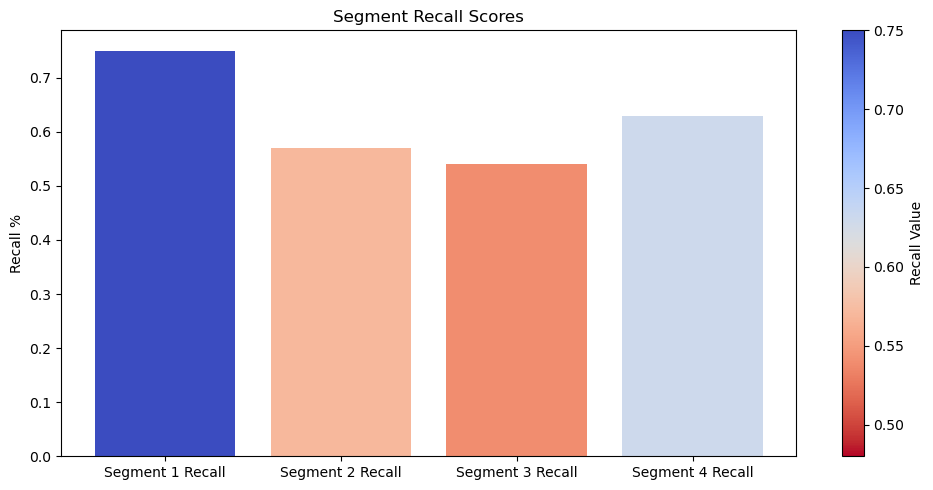

In [49]:
# create precision dictionary
precision_dict = {'Segment 1 Recall': .75, 'Segment 2 Recall': .57, 'Segment 3 Recall': .54, 
 'Segment 4 Recall':.63}

# get height dependent colors
norm = plt.Normalize(0.48, 0.75)
colors = plt.cm.coolwarm_r(norm(list(precision_dict.values())))

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x=precision_dict.keys(), height=precision_dict.values(), color=colors)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r'), label='Recall Value', ax=ax)
plt.title('Segment Recall Scores')
plt.ylabel('Recall %')
plt.tight_layout()

In [50]:
combined_coef = pd.concat([coefficients_0, coefficients_1, coefficients_2, coefficients_3], axis=1)
combined_coef.columns = ['Feature_0', 'Coefficient_0', 'Cluster_0', 'Feature_1', 'Coefficient_1', 'Cluster_1', 
                         'Feature_2', 'Coefficient_2', 'Cluster_2', 'Feature_3', 'Coefficient_3', 'Cluster_3']
combined_coef.round(2)

,Feature_0,Coefficient_0,Cluster_0,Feature_1,Coefficient_1,Cluster_1,Feature_2,Coefficient_2,Cluster_2,Feature_3,Coefficient_3,Cluster_3
0,price_usd,-0.31,0,price_usd,-0.52,1,price_usd,-0.14,2,price_usd,-0.35,3
1,srch_length_of_stay,-0.17,0,srch_length_of_stay,-0.16,1,srch_length_of_stay,-0.14,2,srch_length_of_stay,-0.18,3
2,srch_adults_count,-0.15,0,srch_adults_count,-0.03,1,srch_adults_count,-0.05,2,srch_adults_count,0.00,3
3,srch_children_count,0.02,0,srch_children_count,-0.01,1,srch_children_count,-0.10,2,srch_children_count,0.39,3
4,srch_room_count,0.07,0,srch_room_count,-0.01,1,srch_room_count,-0.00,2,srch_room_count,0.21,3
5,orig_destination_distance,-0.00,0,orig_destination_distance,0.01,1,orig_destination_distance,-0.03,2,orig_destination_distance,0.02,3
6,prop_starrating,0.24,0,prop_starrating,0.23,1,prop_starrating,0.26,2,prop_starrating,0.24,3
7,prop_review_score,0.14,0,prop_review_score,-0.03,1,prop_review_score,0.28,2,prop_review_score,0.18,3
8,promotion_flag,0.29,0,promotion_flag,0.38,1,promotion_flag,0.57,2,promotion_flag,0.37,3
9,srch_saturday_night_bool,-0.02,0,srch_saturday_night_bool,0.05,1,srch_saturday_night_bool,-0.01,2,srch_saturday_night_bool,0.08,3


#### Segment 1

C:\Users\tcame\AppData\Local\Temp\ipykernel_18828\4158167959.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster0, x='Coefficient', y='Feature', palette=colors)


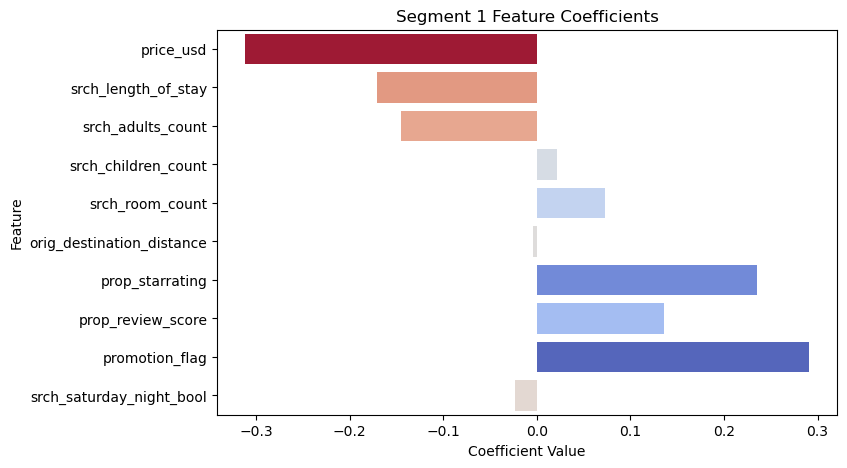

In [51]:
cluster0 = combined_coef[['Feature_0','Coefficient_0','Cluster_0']].rename(columns={'Feature_0':'Feature','Coefficient_0':'Coefficient','Cluster_0':'Cluster'})

coeffs = cluster0['Coefficient']

# symmetric around 0 so colors are balanced
max_abs = coeffs.abs().max()
norm = plt.Normalize(vmin=-max_abs, vmax=max_abs)
cmap = plt.cm.coolwarm_r
colors = [cmap(norm(c)) for c in coeffs]

plt.figure(figsize=(8,5))
sns.barplot(data=cluster0, x='Coefficient', y='Feature', palette=colors)
plt.title('Segment 1 Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

**Findings**: 
1. They do not have a lot of adults on their trips (likely solo travelers)
2. They do not travel far as the destination distance has little influence, but is still in the positive direction
3. They have the lowest promotion flag influence, but it is still a strong contributor and means promotions should still be considered for this group

#### Segment 2

C:\Users\tcame\AppData\Local\Temp\ipykernel_18828\3220766713.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster1, x='Coefficient', y='Feature', palette=colors)


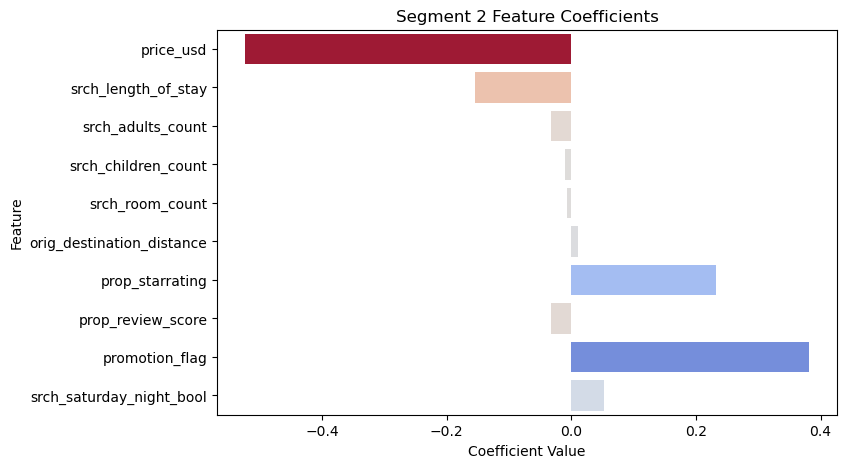

In [52]:
cluster1 = combined_coef[['Feature_1','Coefficient_1','Cluster_1']].rename(columns={'Feature_1':'Feature','Coefficient_1':'Coefficient','Cluster_1':'Cluster'})

coeffs = cluster1['Coefficient']

# symmetric around 0 so colors are balanced
max_abs = coeffs.abs().max()
norm = plt.Normalize(vmin=-max_abs, vmax=max_abs)
cmap = plt.cm.coolwarm_r
colors = [cmap(norm(c)) for c in coeffs]

plt.figure(figsize=(8,5))
sns.barplot(data=cluster1, x='Coefficient', y='Feature', palette=colors)
plt.title('Segment 2 Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

**Findings**:
1. Extremely price sensitive, they shop for deals given the extreme coefficient on the price variable
2. They look for slightly further getaways
3. They do not care about the property review score as they actually book properties with lower scores more often.
4. They have a slight tendency to favor saturday night weekend trips

#### Segment 3

C:\Users\tcame\AppData\Local\Temp\ipykernel_18828\1303804822.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster2, x='Coefficient', y='Feature', palette=colors)


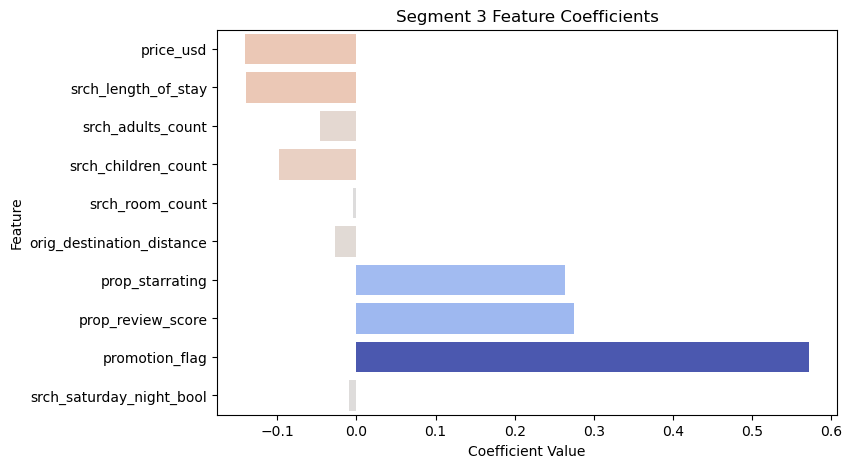

In [53]:
cluster2 = combined_coef[['Feature_2','Coefficient_2','Cluster_2']].rename(columns={'Feature_2':'Feature','Coefficient_2':'Coefficient','Cluster_2':'Cluster'})

coeffs = cluster2['Coefficient']

# symmetric around 0 so colors are balanced
max_abs = coeffs.abs().max()
norm = plt.Normalize(vmin=-max_abs, vmax=max_abs)
cmap = plt.cm.coolwarm_r
colors = [cmap(norm(c)) for c in coeffs]

plt.figure(figsize=(8,5))
sns.barplot(data=cluster2, x='Coefficient', y='Feature', palette=colors)
plt.title('Segment 3 Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

**Findings**:
1. Not price sensitive, while price does influence their booking decisions it does so at a much smaller amount than the rest of the groups. They are more likely a wealthier group.
2. They also have the smallest coefficient on search length of stay, thus they tend to book the longest trips.
3. They are the only group with a negative coefficient for children, meaning they do not book with children. These are likely couples without children
4. They have a negative coefficient on destination distance, they're a group that does not travel far
5. The star rating and review scores of places have a major influence on their booking decisions, thus they favor staying at places with very strong positive reviews
6. Promotions are huge for this group

#### Segment 4

C:\Users\tcame\AppData\Local\Temp\ipykernel_18828\893481930.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster3, x='Coefficient', y='Feature', palette=colors)


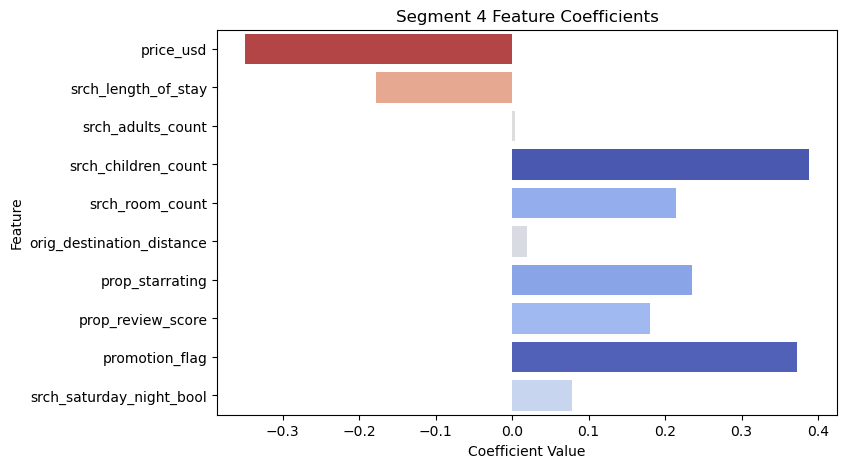

In [54]:
cluster3 = combined_coef[['Feature_3','Coefficient_3','Cluster_3']].rename(columns={'Feature_3':'Feature','Coefficient_3':'Coefficient','Cluster_3':'Cluster'})

coeffs = cluster3['Coefficient']

# symmetric around 0 so colors are balanced
max_abs = coeffs.abs().max()
norm = plt.Normalize(vmin=-max_abs, vmax=max_abs)
cmap = plt.cm.coolwarm_r

colors = [cmap(norm(c)) for c in coeffs]

plt.figure(figsize=(8,5))
sns.barplot(data=cluster3, x='Coefficient', y='Feature', palette=colors)
plt.title('Segment 4 Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


**Findings**:
1. Children play a large factor in this groups decision as they are often searching for places with their children.
2. They often book for more than one room
3. They book the furthest getaways
4. Most often on saturday nights